# KNN to fill in the blancs and R F





---





---



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [5]:
data = pd.read_csv('welddb/welddb_cleaned.csv')

In [6]:
from sklearn.impute import KNNImputer

# Définir l'imputer KNN avec n_neighbors défini
knn_imputer = KNNImputer(n_neighbors=5)

# Imputation des données
data_imputed = knn_imputer.fit_transform(data)

RandomForest

Évaluation de la colonne cible : Yield strength (MPa)
RMSE: 38.12605403037004, R²: 0.7795853288090399
Validation croisée RMSE: 0.47644959256495045


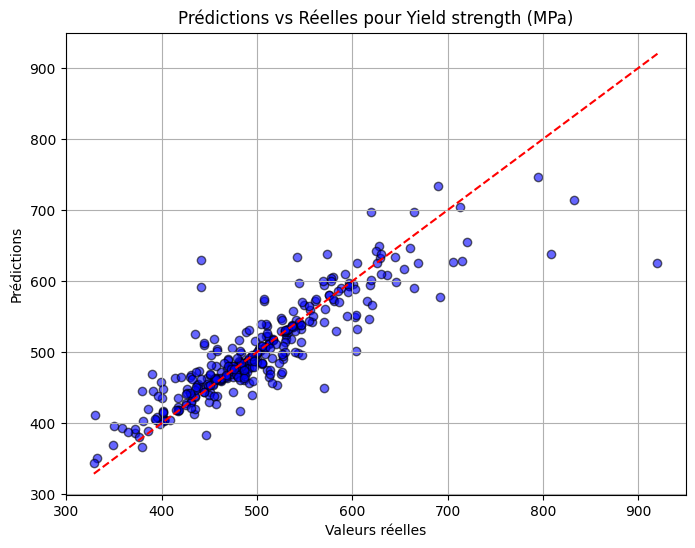

Évaluation de la colonne cible : Ultimate tensile strength (MPa)
RMSE: 37.373542173612165, R²: 0.7855925338454643
Validation croisée RMSE: 0.38317882327917324


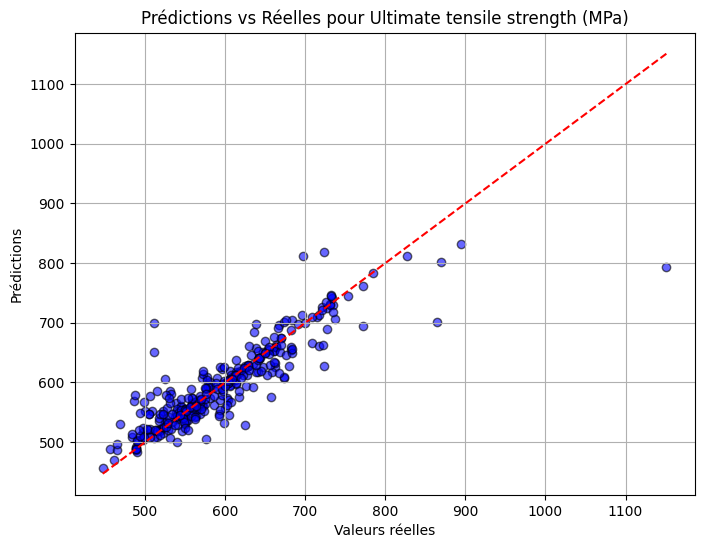

Évaluation de la colonne cible : Elongation (%)
RMSE: 2.1839527762939404, R²: 0.7720091542942015
Validation croisée RMSE: 0.4448743798975427


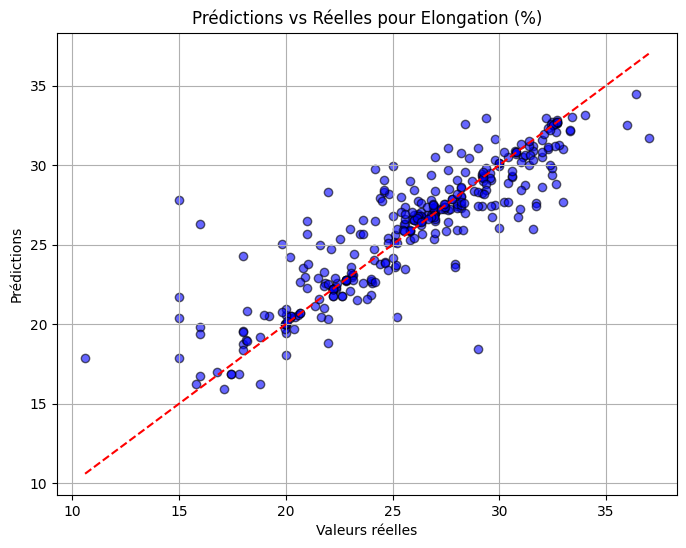

Évaluation de la colonne cible : Reduction of Area (%)
RMSE: 3.1382803011062688, R²: 0.8328126701868923
Validation croisée RMSE: 0.4298728945078022


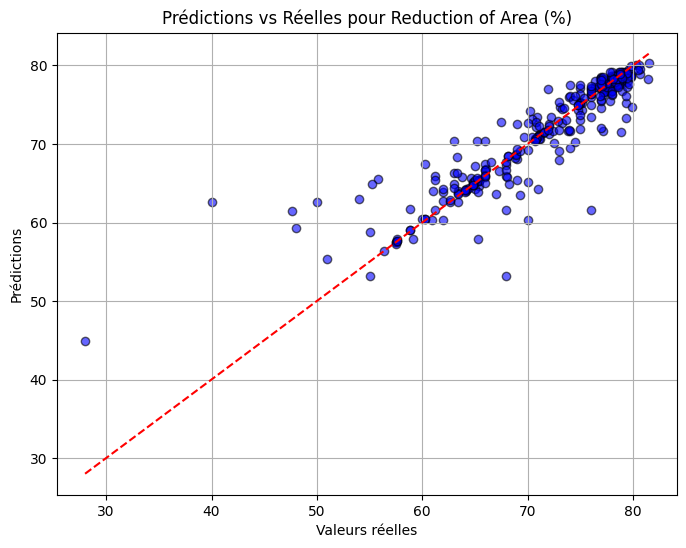

Évaluation de la colonne cible : Charpy impact toughness (J)
RMSE: 15.167490920042445, R²: 0.8455238036132338
Validation croisée RMSE: 0.4470892515509231


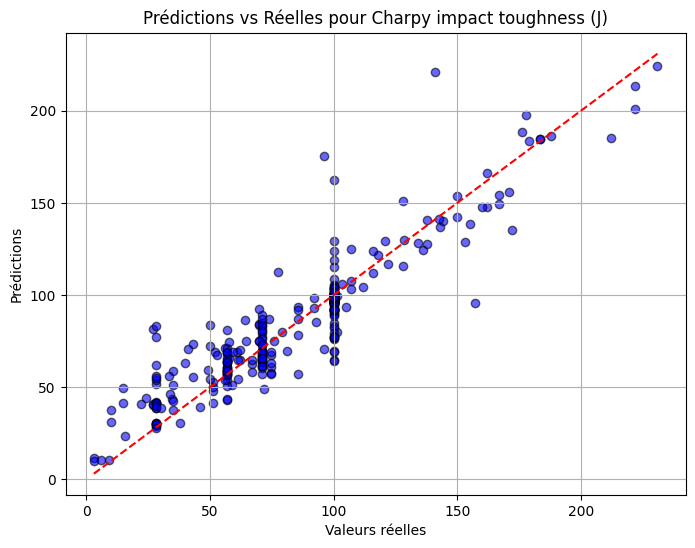

Évaluation de la colonne cible : Hardness (kgmm-2)
RMSE: 13.506948037591586, R²: 0.8985882342512816
Validation croisée RMSE: 0.3671082637317484


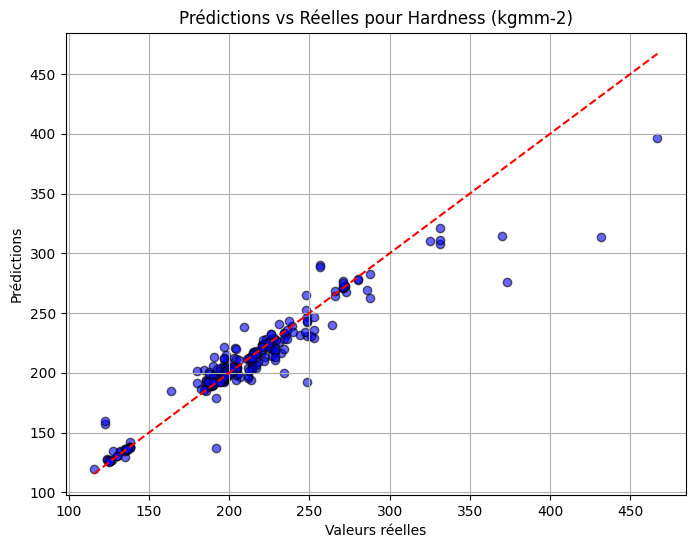

Colonne cible: Yield strength (MPa) | RMSE: 38.12605403037004 | R²: 0.7795853288090399
Colonne cible: Ultimate tensile strength (MPa) | RMSE: 37.373542173612165 | R²: 0.7855925338454643
Colonne cible: Elongation (%) | RMSE: 2.1839527762939404 | R²: 0.7720091542942015
Colonne cible: Reduction of Area (%) | RMSE: 3.1382803011062688 | R²: 0.8328126701868923
Colonne cible: Charpy impact toughness (J) | RMSE: 15.167490920042445 | R²: 0.8455238036132338
Colonne cible: Hardness (kgmm-2) | RMSE: 13.506948037591586 | R²: 0.8985882342512816


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Initialisation des listes pour stocker les résultats
rmse_list = []
r2_list = []


target_columns = ['Yield strength (MPa)',
       'Ultimate tensile strength (MPa)', 'Elongation (%)',
       'Reduction of Area (%)',
       'Charpy impact toughness (J)', 'Hardness (kgmm-2)']

# Conversion du NumPy array imputé en DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Normalisation des caractéristiques (très important pour SVR)
scaler_X = StandardScaler()
X = scaler_X.fit_transform(data_imputed_df.drop(columns=target_columns))  # Exclure les colonnes cibles

# Boucle pour chaque colonne cible
for target_column in target_columns:

    print(f"Évaluation de la colonne cible : {target_column}")

    # Extraire et normaliser la colonne cible (y)
    y = data_imputed_df[target_column].values.reshape(-1, 1)
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y).ravel()  # On a besoin d'un vecteur aplati pour SVR

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    # Entraîner un modèle SVR
    svr_model = RandomForestRegressor()
    svr_model.fit(X_train, y_train)

    # Prédictions sur les données de test
    y_pred_scaled = svr_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverser la normalisation

    # Inverser la transformation de y_test pour calculer les métriques
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"RMSE: {rmse}, R²: {r2}")

    # Cross-validation pour évaluer la performance sur l'ensemble d'entraînement
    cross_val_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_rmse = np.sqrt(-cross_val_scores.mean())
    print(f"Validation croisée RMSE: {cross_val_rmse}")

    # Affichage du graphique prédictions vs valeurs réelles
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_original, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
    plt.title(f'Prédictions vs Réelles pour {target_column}')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.grid(True)
    plt.show()

# Affichage des résultats globaux
for i, col in enumerate(target_columns):
    print(f"Colonne cible: {col} | RMSE: {rmse_list[i]} | R²: {r2_list[i]}")
